# LiDAR Visualization Assignment

# Dataset Summary

The LiDAR dataset provided here contains a classified point cloud of a forested area in Ottawa County, Michigan, USA, 
collected through airborne laser scanning and stored in .laz format, which is a compressed representation of the standard LAS 
format of LiDAR data. Each point has associated spatial coordinates (X, Y, Z), as well as additional attributes, including 
classification codes identifying ground, vegetation (including trees), and other surfaces. This dataset allows for exploration 
of the landform and forest structure, for separating ground points and visualizing elevation differences in 2D and 3D.

In [ ]:
# File: 20180518_MI_Ottawa_NF_North_63956.copc.laz
# las_path = "data/20180518_MI_Ottawa_NF_North_63956.copc.laz"

Stored file path in las_path (variable)

In [2]:
import laspy
import numpy as np
import matplotlib.pyplot as plt

# dataset metadata below 

In [3]:
# Path of downloaded LAZ file
las_path = "data/20180518_MI_Ottawa_NF_North_63956.copc.laz"

# Load LAZ file
las = laspy.read(las_path)

# Extract coordinates
x = las.x
y = las.y
z = las.z

print("Total Points:", len(x))
print("Min Z (Elevation):", np.min(z))
print("Max Z (Elevation):", np.max(z))

Total Points: 3110822
Min Z (Elevation): 442.8014496554617
Max Z (Elevation): 505.44144965546167


# 3D visualization

In [4]:
from mpl_toolkits.mplot3d import Axes3D

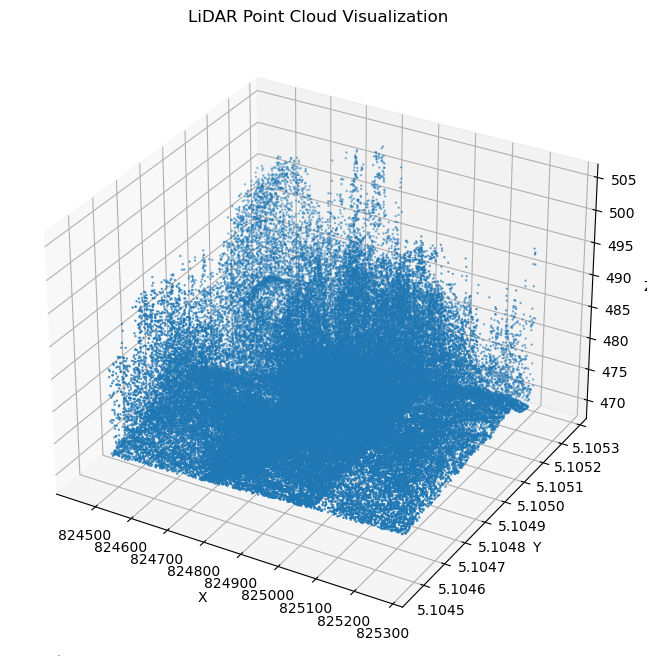

In [4]:
# Use a smaller sample for faster plotting (example: 100k points)
sample_size = 100000
indices = np.random.choice(len(x), sample_size, replace=False)

xs = x[indices]
ys = y[indices]
zs = z[indices]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=0.5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("LiDAR Point Cloud Visualization")

plt.show()

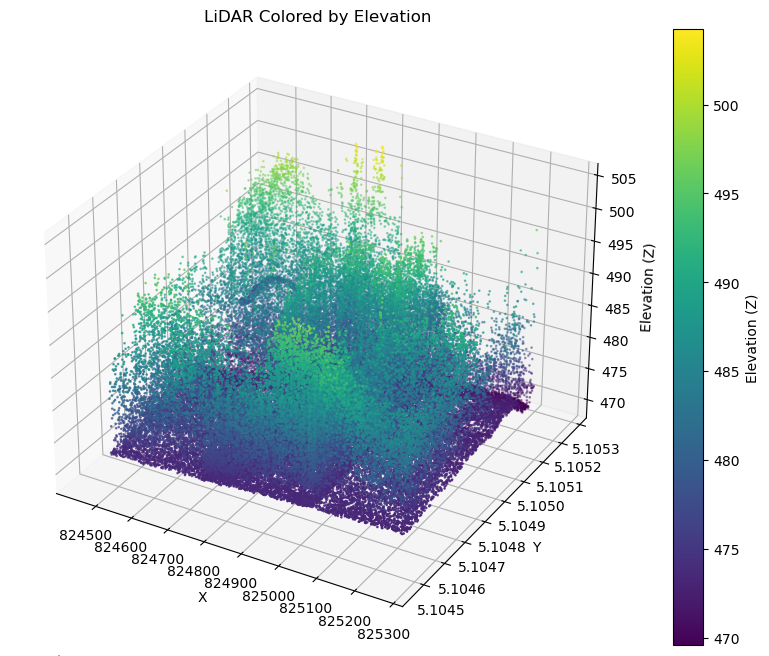

In [8]:
from mpl_toolkits.mplot3d import Axes3D
# Using the same sample from earlier
sample_size = 100000
indices = np.random.choice(len(x), sample_size, replace=False)

xs = x[indices]
ys = y[indices]
zs = z[indices]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(xs, ys, zs, c=zs, cmap="viridis", s=0.8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("LiDAR Colored by Elevation")

fig.colorbar(scatter, label="Elevation (Z)")
plt.show()


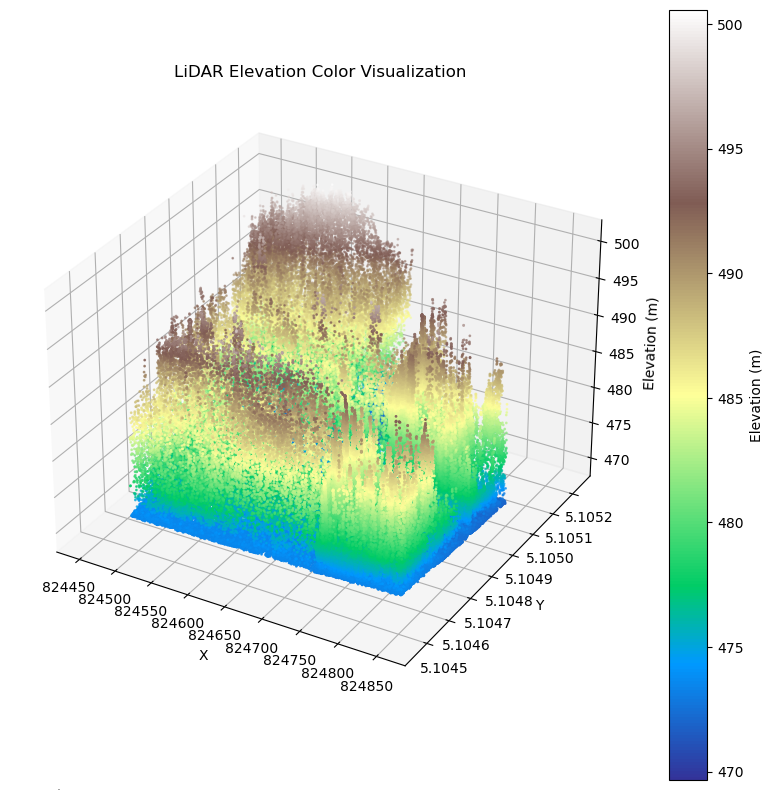

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x[:500000], y[:500000], z[:500000],
                     c=z[:500000], s=1, cmap='terrain')

ax.set_title("LiDAR Elevation Color Visualization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (m)")

fig.colorbar(scatter, label="Elevation (m)")
plt.show()


# 2D visualization

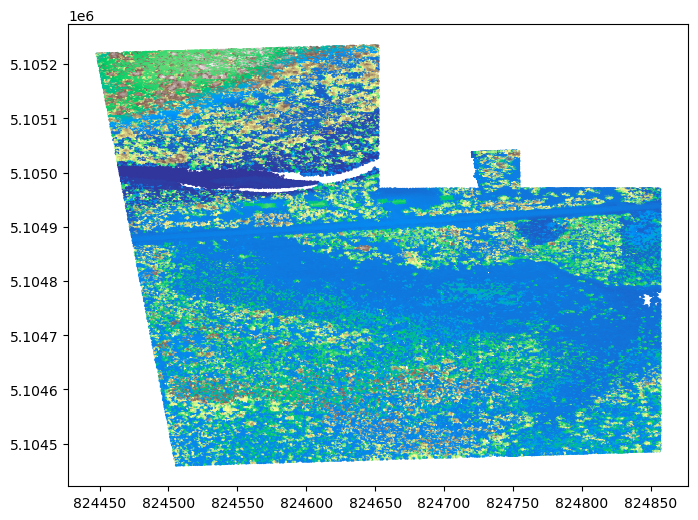

In [14]:
# We plot a top view (X vs Y) of the first 500k points
# Why first 500k?
# -> Faster rendering, whole dataset is 3 million points, too heavy for normal laptops

plt.figure(figsize=(8, 6))

# Scatter plot shows each LiDAR point as a dot
plt.scatter(
    x[:500000],      # used slicing to get X coordinates (position on earth)
    y[:500000],      # used slicing to get Y coordinates
    c=z[:500000],       # Color the dots according to height (Z)
    cmap='terrain',     # Earth-like color map (green to brown to white)
    s=0.5               # Dot size (very small to make the picture visible)
)

plt.show()


# Top Down projection ( color-based)

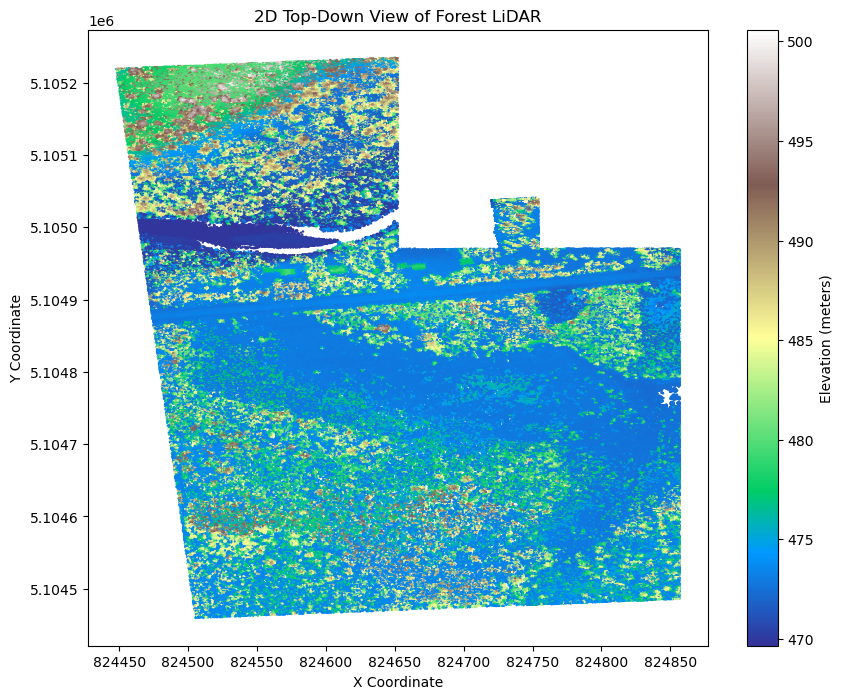

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(
    x[:500000],y[:500000],c=z[:500000],cmap='terrain',s=0.5)

plt.title("2D Top-Down View of Forest LiDAR")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.colorbar(label="Elevation (meters)")  # shows color scale for height
plt.show()


#  4. Point Classification Segmentation

Creating a segmentation section showing:
Ground vs non-ground separation

Ground Points: 703241
Non-Ground Points: 2407581


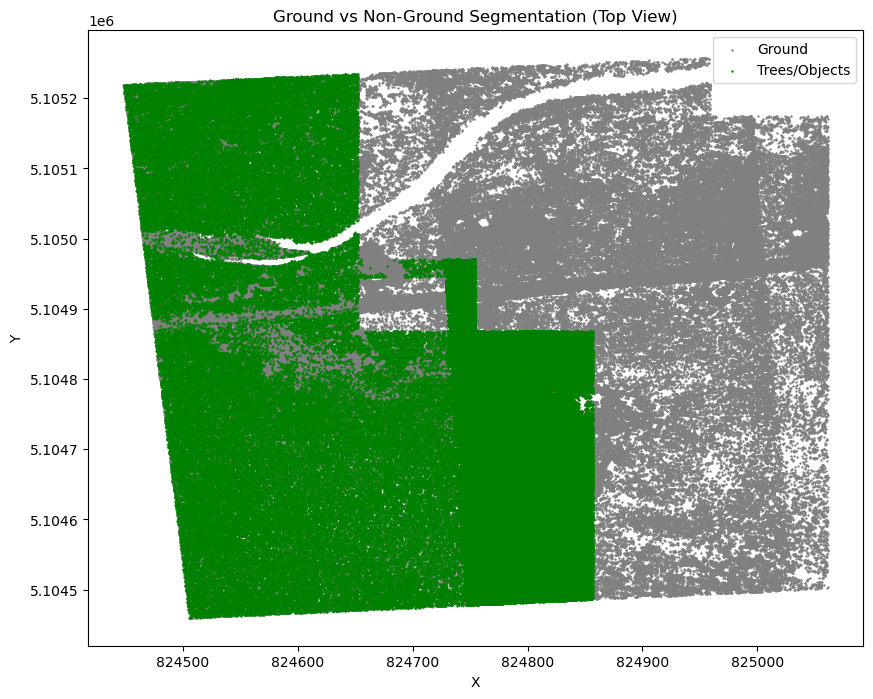

In [5]:
# --- Ground vs Non-Ground Segmentation ---

# We take the classification values from the LAS file
classification = las.classification

# Ground points are usually class = 2
ground_points = classification == 2
non_ground_points = classification != 2

# Separate them
x_ground = x[ground_points]
y_ground = y[ground_points]
z_ground = z[ground_points]

x_non_ground = x[non_ground_points]
y_non_ground = y[non_ground_points]
z_non_ground = z[non_ground_points]

print("Ground Points:", len(x_ground))
print("Non-Ground Points:", len(x_non_ground))

# For fast plotting, only take first 300k from each group
plt.figure(figsize=(10,8))

plt.scatter(x_ground[:300000], y_ground[:300000], s=0.5, color='gray', label="Ground")
plt.scatter(x_non_ground[:300000], y_non_ground[:300000], s=0.5, color='green', label="Trees/Objects")

plt.title("Ground vs Non-Ground Segmentation (Top View)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Segmentation Criteria Used:
We used the classification labels inside the LAS file.
Ground points are stored with class 2, and anything that is not class 2 which is non-ground (mainly trees and vegetation in this forest dataset).
that are stored with not.
Observation:
Ground appears more flat and evenly spread (grey in color).
Non-ground points (green in color) show tree clusters and height variation.

Height-based segmentation (Tall Trees vs Short Vegetation)

Short Vegetation Points: 1
Tall Vegetation Points: 3110821


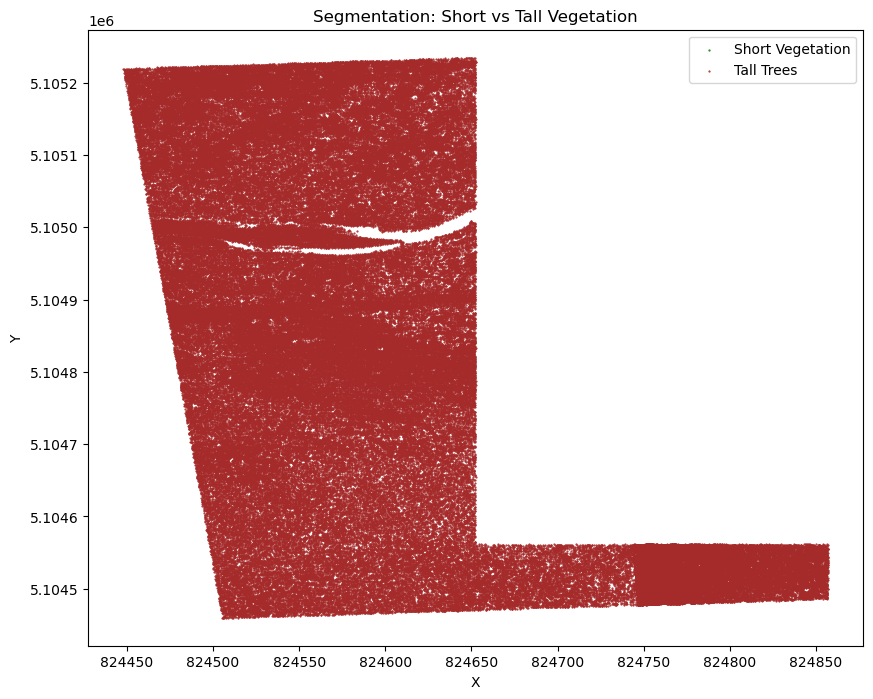

In [7]:
# Height-based segmentation for vegetation

height_threshold = 465  # meters

# Create boolean masks for filtering
short_mask = z < height_threshold
tall_mask = z >= height_threshold

# Apply masks to get coordinates
short_x = x[short_mask]
short_y = y[short_mask]
short_z = z[short_mask]

tall_x = x[tall_mask]
tall_y = y[tall_mask]
tall_z = z[tall_mask]

print("Short Vegetation Points:", len(short_x))
print("Tall Vegetation Points:", len(tall_x))

# Visualization (2D top view)
plt.figure(figsize=(10, 8))

plt.scatter(short_x[:200000], short_y[:200000],
            c="green", s=0.3, label="Short Vegetation")

plt.scatter(tall_x[:200000], tall_y[:200000],
            c="brown", s=0.3, label="Tall Trees")

plt.title("Segmentation: Short vs Tall Vegetation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Based on the height threshold of 465 meters, the LiDAR points were separated into short vegetation (e.g., small bushes/grass) and tall vegetation (e.g., trees).
The visualization shows that most of the points are tall vegetation, indicating dense tree cover in the scanned area. Only a very small portion was classified as short vegetation.
This helps understand the vegetation structure and forest density in the region.

5. Elevation Modeling Outputs
Develop visual outputs for:
A Digital Elevation Model (DEM)

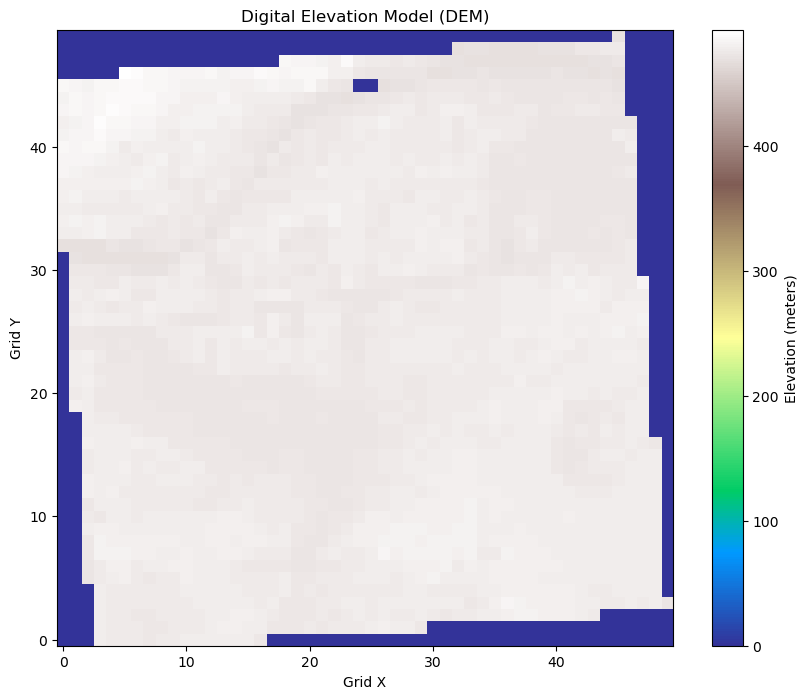

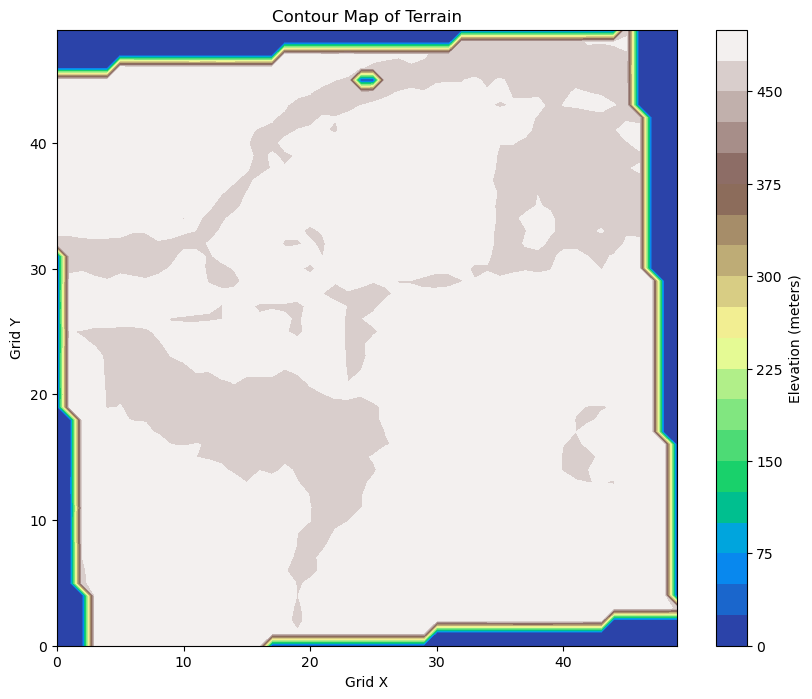

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# I am choosing a small grid size because the dataset is big
grid_size = 50  

# Converting real world X and Y coordinates into small grid numbers
xi = np.interp(x, (x.min(), x.max()), (0, grid_size - 1)).astype(int)
yi = np.interp(y, (y.min(), y.max()), (0, grid_size - 1)).astype(int)

# Making an empty 2D grid for elevation
dem_grid = np.zeros((grid_size, grid_size))

# Counting how many LiDAR points fall in each small grid cell
count = np.zeros((grid_size, grid_size))

# Loop: add height (Z) values into each grid cell
for i in range(len(z)):
    dem_grid[yi[i], xi[i]] += z[i]
    count[yi[i], xi[i]] += 1

# Avoid division by zero using where statement
dem_grid = np.divide(dem_grid, count, out=np.zeros_like(dem_grid), where=count != 0)

# Plot DEM like a heat map
plt.figure(figsize=(10, 8))
plt.imshow(dem_grid, cmap='terrain', origin='lower')
plt.colorbar(label="Elevation (meters)")
plt.title("Digital Elevation Model (DEM)")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()

# ----- Contour Map -----
plt.figure(figsize=(10, 8))
plt.contourf(dem_grid, cmap='terrain', levels=20)
plt.colorbar(label="Elevation (meters)")
plt.title("Contour Map of Terrain")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()


# Final Report Summary

While working on this LiDAR assignment, I learned how to load .laz point cloud data using Python. At first, I didn’t even know what LiDAR is or how point clouds work, but slowly I understood that these are just millions of tiny points in 3D space that show trees, ground and height differences. I also learned how to show them in 2D (top view) and 3D with colors based on height so we can understand the forest area better.

I did segmentation using ground vs non-ground and also small vs tall vegetation. I decided the height limit myself by checking the values in Z (elevation). It helped me understand that ground is lower and trees are higher. Visualization helped me see the forest structure more clearly.

For elevation modeling, I created a DEM and contour map using the grid method from the Z values. It showed that the land is not flat and has some height changes.

# Key Findings

Trees are very tall in the area (high Z values)

Ground occupies a smaller portion of points than vegetation

From top-down view, forest density is visible clearly

Elevation difference helps to identify terrain patterns

# Challenges Faced

Huge dataset, so plotting entire points was slow for my laptop

Understanding LiDAR formats (.laz) was little confusing at first

Segmentation logic was difficult since I didn’t know exact height ranges

# Data Quality Observations

Noise points exist a little (some unexpected heights)

Classification field was mostly zeros, so I used a height-based method

Some vegetation points were extremely high (maybe tree tops or artifacts)

# Real-World Use of LiDAR Visualization

Helpful in forest height monitoring and biomass estimation

Can detect landform for mapping and planning

Useful for flood modelling by identifying low areas

Helps analyze natural environment changes over time

# My Personal Learning

I honestly started with zero knowledge, but now I can:

Read LiDAR data

Visualize it in 2D and 3D

Separate different kinds of points

Create elevation-based maps

This assignment helped me understand LiDAR in a beginner-friendly way, and I feel more confident now.